#**Import Statements**

In [ ]:
!pip install opendatasets

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 11.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import opendatasets as od

# **Data Cleaning**

In [ ]:
od.download("https://www.kaggle.com/datasets/sumitrodatta/nba-aba-baa-stats?select=Player+Per+Game.csv")
od.download("https://www.kaggle.com/datasets/loganlauton/nba-injury-stats-1951-2023")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: arav3131
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sumitrodatta/nba-aba-baa-stats


100%|██████████| 10.3M/10.3M [00:00<00:00, 21.2MB/s]



Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: arav3131
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/loganlauton/nba-injury-stats-1951-2023


100%|██████████| 425k/425k [00:00<00:00, 60.9MB/s]

In [ ]:
player_stats = pd.read_csv("/content/nba-aba-baa-stats/Player Per Game.csv")
player_stats_advanced = pd.read_csv("/content/nba-aba-baa-stats/Advanced.csv")
injuries_original = pd.read_csv("/content/nba-injury-stats-1951-2023/NBA Player Injury Stats(1951 - 2023).csv")

In [ ]:
player_stats.columns[0]

'seas_id'

In [ ]:
injuries_original.columns[0]

'Unnamed: 0'

In [ ]:
player_stats = player_stats.drop(columns = player_stats.columns[0], axis=1)

In [ ]:
player_stats_advanced = player_stats_advanced.drop(columns = ['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age','experience', 'lg', 'tm', 'g', 'mp'])

In [ ]:
player_stats.columns

Index(['season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'gs', 'mp_per_game', 'fg_per_game',
       'fga_per_game', 'fg_percent', 'x3p_per_game', 'x3pa_per_game',
       'x3p_percent', 'x2p_per_game', 'x2pa_per_game', 'x2p_percent',
       'e_fg_percent', 'ft_per_game', 'fta_per_game', 'ft_percent',
       'orb_per_game', 'drb_per_game', 'trb_per_game', 'ast_per_game',
       'stl_per_game', 'blk_per_game', 'tov_per_game', 'pf_per_game',
       'pts_per_game'],
      dtype='object')

In [ ]:
player_stats = pd.concat([player_stats, player_stats_advanced], axis=1)

In [ ]:
player_stats

season  player_id          player  birth_year  pos   age  experience  \
0        2024       5025      A.J. Green         NaN   SG  24.0           2   
1        2024       5026     A.J. Lawson         NaN   SG  23.0           2   
2        2024       5027      AJ Griffin         NaN   SF  20.0           2   
3        2024       4219    Aaron Gordon         NaN   PF  28.0          10   
4        2024       4582   Aaron Holiday         NaN   PG  27.0           6   
...       ...        ...             ...         ...  ...   ...         ...   
31865    1947        157     Walt Miller         NaN    F  31.0           1   
31866    1947        158   Warren Fenley         NaN    F  24.0           1   
31867    1947        159   Wilbert Kautz         NaN  G-F  31.0           1   
31868    1947        160  Woody Grimshaw         NaN    G  27.0           1   
31869    1947        161     Wyndol Gray         NaN  G-F  24.0           1   

        lg   tm   g  ...  tov_percent  usg_percent  ows  dws   ws  ws_48  \
0      NBA  MIL  56  ...          5.5         15.2  0.7  0.3  1.1  0.084   
1      NBA  DAL  42  ...          9.6         20.0  0.0  0.3  0.2  0.036   
2      NBA  ATL  20  ...         11.3         17.3 -0.4  0.0 -0.4 -0.120   
3      NBA  DEN  73  ...         11.2         17.8  4.5  2.6  7.1  0.148   
4      NBA  HOU  78  ...         10.6         16.7  1.3  1.2  2.5  0.094   
...    ...  ...  ..  ...          ...          ...  ...  ...  ...    ...   
31865  BAA  PIT  12  ...          NaN          NaN  0.3 -0.1  0.3    NaN   
31866  BAA  BOS  33  ...          NaN          NaN -0.4  0.3 -0.1    NaN   
31867  BAA  CHS  50  ...          NaN          NaN -0.7  1.5  0.8    NaN   
31868  BAA  PRO  21  ...          NaN          NaN  0.6  0.0  0.6    NaN   
31869  BAA  BOS  55  ...          NaN          NaN  1.6  0.7  2.2    NaN   

       obpm  dbpm  bpm  vorp  
0      -0.4  -1.7 -2.1   0.0  
1      -3.1  -1.5 -4.6  -0.2  
2      -6.0  -3.5 -9.6  -0.3  
3       1.2   0.1  1.3   1.9  
4      -1.8   0.3 -1.5   0.2  
...     ...   ...  ...   ...  
31865   NaN   NaN  NaN   NaN  
31866   NaN   NaN  NaN   NaN  
31867   NaN   NaN  NaN   NaN  
31868   NaN   NaN  NaN   NaN  
31869   NaN   NaN  NaN   NaN  

[31870 rows x 54 columns]

In [ ]:
injuries_original = injuries_original.drop(columns=injuries_original.columns[0], axis=1)

In [ ]:
injuries_original

Date       Team            Acquired    Relinquished  \
0      1951-12-25    Bullets                 NaN   Don Barksdale   
1      1952-12-26     Knicks                 NaN   Max Zaslofsky   
2      1956-12-29     Knicks                 NaN   Jim Baechtold   
3      1959-01-16     Lakers                 NaN    Elgin Baylor   
4      1961-11-26     Lakers                 NaN    Elgin Baylor   
...           ...        ...                 ...             ...   
37662  2023-04-16   Clippers       Marcus Morris             NaN   
37663  2023-04-16  Grizzlies       Dillon Brooks             NaN   
37664  2023-04-16  Grizzlies           Ja Morant             NaN   
37665  2023-04-16  Grizzlies   Jaren Jackson Jr.             NaN   
37666  2023-04-16  Grizzlies        Santi Aldama             NaN   

                                                   Notes  
0                                           placed on IL  
1                     placed on IL with torn side muscle  
2                                placed on inactive list  
3      player refused to play after being denied a ro...  
4                      player reported for military duty  
...                                                  ...  
37662                                  activated from IL  
37663                                  activated from IL  
37664                                  activated from IL  
37665                                  activated from IL  
37666                                  activated from IL  

[37667 rows x 5 columns]

Filter out injuries prior to 1996, where the player_stats dataset begins. We also don't want any rows where someone was activated, we care about the injury itself

In [ ]:
injuries_date_filtered = injuries_original[(injuries_original['Date']>'2000-08-01') & (injuries_original['Date']<'2023-07-01')]

In [ ]:
injuries_date_filtered

Date       Team            Acquired  \
4211   2000-10-30      76ers                 NaN   
4212   2000-10-30      76ers                 NaN   
4213   2000-10-30      76ers                 NaN   
4214   2000-10-30    Blazers                 NaN   
4215   2000-10-30    Blazers                 NaN   
...           ...        ...                 ...   
37662  2023-04-16   Clippers       Marcus Morris   
37663  2023-04-16  Grizzlies       Dillon Brooks   
37664  2023-04-16  Grizzlies           Ja Morant   
37665  2023-04-16  Grizzlies   Jaren Jackson Jr.   
37666  2023-04-16  Grizzlies        Santi Aldama   

                          Relinquished  \
4211                   Ademola Okulaja   
4212    Craig Claxton / Speedy Claxton   
4213                       Matt Geiger   
4214                   Arvydas Sabonis   
4215                   Detlef Schrempf   
...                                ...   
37662                              NaN   
37663                              NaN   
37664                              NaN   
37665                              NaN   
37666                              NaN   

                                                   Notes  
4211                     placed on IR with strained back  
4212   placed on IL with torn ACL in left knee (out f...  
4213   placed on IR with recovery from left knee surgery  
4214   placed on IR with recovery from left knee surgery  
4215   placed on IR with pinched nerve in neck (playe...  
...                                                  ...  
37662                                  activated from IL  
37663                                  activated from IL  
37664                                  activated from IL  
37665                                  activated from IL  
37666                                  activated from IL  

[33456 rows x 5 columns]

Removing Relinquished Column

In [ ]:
injuries = injuries_date_filtered[~(injuries_date_filtered['Relinquished'].isna())]

In [ ]:
injuries

Date       Team Acquired                     Relinquished  \
4211   2000-10-30      76ers      NaN                  Ademola Okulaja   
4212   2000-10-30      76ers      NaN   Craig Claxton / Speedy Claxton   
4213   2000-10-30      76ers      NaN                      Matt Geiger   
4214   2000-10-30    Blazers      NaN                  Arvydas Sabonis   
4215   2000-10-30    Blazers      NaN                  Detlef Schrempf   
...           ...        ...      ...                              ...   
37624  2023-04-09  Grizzlies      NaN                        Ja Morant   
37625  2023-04-09  Grizzlies      NaN                Jaren Jackson Jr.   
37630  2023-04-09      Kings      NaN                  Davion Mitchell   
37631  2023-04-09     Knicks      NaN                     Trevor Keels   
37633  2023-04-09      Spurs      NaN                     Zach Collins   

                                                   Notes  
4211                     placed on IR with strained back  
4212   placed on IL with torn ACL in left knee (out f...  
4213   placed on IR with recovery from left knee surgery  
4214   placed on IR with recovery from left knee surgery  
4215   placed on IR with pinched nerve in neck (playe...  
...                                                  ...  
37624                placed on IL with right hand injury  
37625                  placed on IL with sore left elbow  
37630                   placed on IL with sore left knee  
37631                          placed on IL with illness  
37633                 placed on IL with lacerated finger  

[17753 rows x 5 columns]

In [ ]:
injuries = injuries.drop(columns = 'Acquired')

When combining, have to keep date(convert to season?), team, relinquished, and notes

In [ ]:
injuries = injuries.reset_index(drop=True)

In [ ]:
injuries

Date       Team                     Relinquished  \
0      2000-10-30      76ers                  Ademola Okulaja   
1      2000-10-30      76ers   Craig Claxton / Speedy Claxton   
2      2000-10-30      76ers                      Matt Geiger   
3      2000-10-30    Blazers                  Arvydas Sabonis   
4      2000-10-30    Blazers                  Detlef Schrempf   
...           ...        ...                              ...   
17748  2023-04-09  Grizzlies                        Ja Morant   
17749  2023-04-09  Grizzlies                Jaren Jackson Jr.   
17750  2023-04-09      Kings                  Davion Mitchell   
17751  2023-04-09     Knicks                     Trevor Keels   
17752  2023-04-09      Spurs                     Zach Collins   

                                                   Notes  
0                        placed on IR with strained back  
1      placed on IL with torn ACL in left knee (out f...  
2      placed on IR with recovery from left knee surgery  
3      placed on IR with recovery from left knee surgery  
4      placed on IR with pinched nerve in neck (playe...  
...                                                  ...  
17748                placed on IL with right hand injury  
17749                  placed on IL with sore left elbow  
17750                   placed on IL with sore left knee  
17751                          placed on IL with illness  
17752                 placed on IL with lacerated finger  

[17753 rows x 4 columns]

Separate stats by season for categorization(Season starts on October 12th, ends October 11th of next year)

In [ ]:
def find_season(date):
  year = int(date[0:4])
  month = int(date[5:7])
  day = int(date[8:10])
  if month<10:
    return year-1
  elif month==10:
    if day<12:
      return year-1
    else:
      return year
  else:
    return year

In [ ]:
injuries['Date'] = injuries['Date'].apply(find_season)

In [ ]:
injuries

Date       Team                     Relinquished  \
0      2000      76ers                  Ademola Okulaja   
1      2000      76ers   Craig Claxton / Speedy Claxton   
2      2000      76ers                      Matt Geiger   
3      2000    Blazers                  Arvydas Sabonis   
4      2000    Blazers                  Detlef Schrempf   
...     ...        ...                              ...   
17748  2022  Grizzlies                        Ja Morant   
17749  2022  Grizzlies                Jaren Jackson Jr.   
17750  2022      Kings                  Davion Mitchell   
17751  2022     Knicks                     Trevor Keels   
17752  2022      Spurs                     Zach Collins   

                                                   Notes  
0                        placed on IR with strained back  
1      placed on IL with torn ACL in left knee (out f...  
2      placed on IR with recovery from left knee surgery  
3      placed on IR with recovery from left knee surgery  
4      placed on IR with pinched nerve in neck (playe...  
...                                                  ...  
17748                placed on IL with right hand injury  
17749                  placed on IL with sore left elbow  
17750                   placed on IL with sore left knee  
17751                          placed on IL with illness  
17752                 placed on IL with lacerated finger  

[17753 rows x 4 columns]

In [ ]:
player_stats = player_stats[(player_stats['season']>=1996) & (player_stats['season']<=2023)]

In [ ]:
player_stats

season  player_id                player  birth_year pos   age  \
735      2023       5025            A.J. Green         NaN  SG  23.0   
736      2023       5026           A.J. Lawson         NaN  SG  22.0   
737      2023       5026           A.J. Lawson         NaN  SG  22.0   
738      2023       5026           A.J. Lawson         NaN  SG  22.0   
739      2023       5027            AJ Griffin         NaN  SF  19.0   
...       ...        ...                   ...         ...  ..   ...   
17325    1996       2478       Willie Anderson         NaN  SG  29.0   
17326    1996       2478       Willie Anderson         NaN  SG  29.0   
17327    1996       2890            Yinka Dare         NaN   C  23.0   
17328    1996       2540  Šarūnas Marčiulionis         NaN  SG  31.0   
17329    1996       2891             Žan Tabak         NaN   C  25.0   

       experience   lg   tm   g  ...  tov_percent  usg_percent  ows  dws   ws  \
735             1  NBA  MIL  35  ...          6.6         16.6  0.5  0.3  0.8   
736             1  NBA  TOT  15  ...          5.9         21.1  0.1  0.1  0.1   
737             1  NBA  MIN   1  ...          0.0         21.4  0.0  0.0  0.0   
738             1  NBA  DAL  14  ...          6.1         21.1  0.1  0.1  0.1   
739             1  NBA  ATL  72  ...          7.1         17.9  1.3  0.9  2.2   
...           ...  ...  ...  ..  ...          ...          ...  ...  ...  ...   
17325           8  NBA  TOR  49  ...         16.9         19.8  0.1  0.8  0.9   
17326           8  NBA  NYK  27  ...         14.1         16.0 -0.2  0.7  0.5   
17327           2  NBA  NJN  58  ...         29.6         17.0 -1.4  1.0 -0.5   
17328           6  NBA  SAC  53  ...         16.8         24.2  1.9  0.7  2.6   
17329           2  NBA  TOR  67  ...         17.9         18.7  0.4  0.6  1.1   

       ws_48  obpm  dbpm  bpm  vorp  
735    0.111  -0.3  -0.6 -0.9   0.1  
736    0.063  -1.5  -2.9 -4.4  -0.1  
737    0.377  -2.3   7.5  5.2   0.0  
738    0.057  -1.5  -3.1 -4.6  -0.1  
739    0.075  -0.3  -0.5 -0.8   0.4  
...      ...   ...   ...  ...   ...  
17325  0.027  -2.0  -0.1 -2.1   0.0  
17326  0.052  -3.6   1.2 -2.4  -0.1  
17327 -0.037  -9.0   0.3 -8.7  -1.0  
17328  0.120   1.6  -0.3  1.3   0.9  
17329  0.038  -3.0  -1.5 -4.6  -0.9  

[16595 rows x 54 columns]

In [ ]:
injuries = injuries.rename(columns={"Relinquished": "player_name"})
injuries = injuries.rename(columns={"Date": "season"})

In [ ]:
injuries

season       Team                      player_name  \
0        2000      76ers                  Ademola Okulaja   
1        2000      76ers   Craig Claxton / Speedy Claxton   
2        2000      76ers                      Matt Geiger   
3        2000    Blazers                  Arvydas Sabonis   
4        2000    Blazers                  Detlef Schrempf   
...       ...        ...                              ...   
17748    2022  Grizzlies                        Ja Morant   
17749    2022  Grizzlies                Jaren Jackson Jr.   
17750    2022      Kings                  Davion Mitchell   
17751    2022     Knicks                     Trevor Keels   
17752    2022      Spurs                     Zach Collins   

                                                   Notes  
0                        placed on IR with strained back  
1      placed on IL with torn ACL in left knee (out f...  
2      placed on IR with recovery from left knee surgery  
3      placed on IR with recovery from left knee surgery  
4      placed on IR with pinched nerve in neck (playe...  
...                                                  ...  
17748                placed on IL with right hand injury  
17749                  placed on IL with sore left elbow  
17750                   placed on IL with sore left knee  
17751                          placed on IL with illness  
17752                 placed on IL with lacerated finger  

[17753 rows x 4 columns]

In [ ]:
player_stats['season'] = player_stats['season'].astype(int)
injuries['season'] = injuries['season'].astype(int)
player_stats['player'] = player_stats['player'].astype(str)
injuries['player_name'] = injuries['player_name'].astype(str)


<ipython-input-29-49ce5bd2c69d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_stats['season'] = player_stats['season'].astype(int)
<ipython-input-29-49ce5bd2c69d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_stats['player'] = player_stats['player'].astype(str)


In [ ]:
injuries = injuries.sort_values(by=['season', 'player_name'])
player_stats = player_stats.sort_values(by=['season', 'player'])


In [ ]:
injuries = injuries.reset_index(drop=True)

In [ ]:
player_stats = player_stats.reset_index(drop=True)

In [ ]:
injuries

season      Team                      player_name  \
0        2000     Bulls                      A.J. Guyton   
1        2000     76ers                  Ademola Okulaja   
2        2000  Warriors                     Adonal Foyle   
3        2000   Celtics                   Adrian Griffin   
4        2000   Celtics                   Adrian Griffin   
...       ...       ...                              ...   
17748    2022  Pelicans                  Zion Williamson   
17749    2022  Pelicans                  Zion Williamson   
17750    2022  Pelicans                  Zion Williamson   
17751    2022     Magic           left knee injury (DTD)   
17752    2022    Lakers   strained left quadriceps (DTD)   

                                                   Notes  
0                  placed on IL with sprained right knee  
1                        placed on IR with strained back  
2      placed on IR with ligament damage in right rin...  
3                    placed on IL with lower back spasms  
4                      placed on IL with sore lower back  
...                                                  ...  
17748               placed on IL with bruised right foot  
17749  placed on IL with NBA health and safety protocols  
17750  placed on IL with strained right hamstring (ou...  
17751                 placed on IL with left knee injury  
17752         placed on IL with strained left quadriceps  

[17753 rows x 4 columns]

Categorize injuries. Since nltk and spacy turned out to be too unreliable, we are using a for loop to check if it contains it, otherwise categorizing it as "other"

In [ ]:
player_stats

season  player_id           player  birth_year pos   age  experience  \
0        1996       2218       A.C. Green         NaN  SF  32.0          11   
1        1996       2832      Aaron McKie         NaN  SG  23.0           2   
2        1996       2761        Acie Earl         NaN   C  25.0           3   
3        1996       2694       Adam Keefe         NaN  PF  25.0           4   
4        1996       2479  Adrian Caldwell         NaN  PF  29.0           4   
...       ...        ...              ...         ...  ..   ...         ...   
16590    2023       4580     Zach Collins         NaN   C  25.0           5   
16591    2023       4299      Zach LaVine         NaN  SG  27.0           9   
16592    2023       4898       Zeke Nnaji         NaN  PF  22.0           3   
16593    2023       5024  Ziaire Williams         NaN  SF  21.0           2   
16594    2023       4803  Zion Williamson         NaN  PF  22.0           3   

        lg   tm   g  ...  tov_percent  usg_percent  ows  dws   ws  ws_48  \
0      NBA  PHO  82  ...         12.6         13.2  2.7  1.7  4.4  0.100   
1      NBA  POR  81  ...         14.3         18.3  2.1  3.2  5.3  0.113   
2      NBA  TOR  42  ...         13.1         25.2 -0.1  0.4  0.3  0.020   
3      NBA  UTA  82  ...         16.8         14.0  2.3  2.3  4.6  0.130   
4      NBA  IND  51  ...         26.2         18.8 -0.2  0.5  0.3  0.044   
...    ...  ...  ..  ...          ...          ...  ...  ...  ...    ...   
16590  NBA  SAS  63  ...         17.4         21.2  1.2  1.0  2.2  0.074   
16591  NBA  CHI  77  ...         11.0         28.3  4.2  2.9  7.1  0.123   
16592  NBA  DEN  53  ...         12.2         15.2  0.9  0.7  1.6  0.106   
16593  NBA  MEM  37  ...         15.2         18.0 -0.5  0.6  0.1  0.011   
16594  NBA  NOP  29  ...         14.6         30.4  2.3  1.2  3.6  0.180   

       obpm  dbpm  bpm  vorp  
0      -0.4  -0.9 -1.3   0.4  
1      -1.3   1.7  0.4   1.4  
2      -3.1  -2.0 -5.1  -0.5  
3      -0.5   0.0 -0.6   0.6  
4      -5.1  -0.7 -5.8  -0.3  
...     ...   ...  ...   ...  
16590  -0.5   0.3 -0.2   0.6  
16591   2.7  -0.7  1.9   2.7  
16592  -2.7  -0.9 -3.7  -0.3  
16593  -4.7  -0.8 -5.6  -0.5  
16594   4.8   1.0  5.8   1.9  

[16595 rows x 54 columns]

In [ ]:
injurylst = ['acl', 'achilles', 'abdom', 'ankle', 'foot', 'knee', 'shoulder', 'finger','thumb', 'nose','heart','neck','head','eye', "wrist", "toe", "feet/hamstring", "calf", "elbow", "groin/disc", "spine", "back", "nail", "chin", "lip", "hand", "leg", "jaw", "cheek", "chest", "collar", "hip", "butt", "waist", "ear", "quadriceps/stomach", "shin", "Achilles", "teeth", "tooth", "abdom", "arm", "tongue", "hair", "scalp"]
for i in range(len(injuries['Notes'])):
  injuries['Notes'][i] = injuries['Notes'][i].lower()
  if any(elem in injuries['Notes'][i] for elem in injurylst):
    for injury in injurylst:
      if injury in injuries['Notes'][i]:
        injuries['Notes'][i] = injury
  else:
    injuries['Notes'][i] = 'other'

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  injuries['Notes'][i] = injuries['Notes'][i].lower()
<ipython-input-35-a69f821a8a9c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries['Notes'][i] = injuries['Notes'][i].lower()
<ipython-input-35-a69f821a8a9c>:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy

In [ ]:
injuries_lists = injuries.copy()
listtodrop = []
startindex = 1
for i in range(1, len(injuries)):
  injuries_lists['Notes'][i] = [injuries['Notes'][i]]
  if injuries['player_name'][i] == injuries['player_name'][i-1]:
    listtodrop.append(i)
    injuries_lists['Notes'][startindex].append(injuries['Notes'][i])
  else:
    startindex = i
injuries_lists = injuries_lists.drop(listtodrop, axis='index')

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  injuries_lists['Notes'][i] = [injuries['Notes'][i]]
<ipython-input-36-fea5ea898190>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_lists['Notes'][i] = [injuries['Notes'][i]]
<ipython-input-36-fea5ea898190>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy

In [ ]:
injuries_lists['Notes'][0] = [injuries['Notes'][0]]

<ipython-input-37-b782bbbe071c>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  injuries_lists['Notes'][0] = [injuries['Notes'][0]]
<ipython-input-37-b782bbbe071c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [ ]:
injuries_lists

season       Team                      player_name  \
0        2000      Bulls                      A.J. Guyton   
1        2000      76ers                  Ademola Okulaja   
2        2000   Warriors                     Adonal Foyle   
3        2000    Celtics                   Adrian Griffin   
6        2000      Hawks                   Alan Henderson   
...       ...        ...                              ...   
17744    2022    Nuggets                       Zeke Nnaji   
17746    2022  Grizzlies                  Ziaire Williams   
17747    2022   Pelicans                  Zion Williamson   
17751    2022      Magic           left knee injury (DTD)   
17752    2022     Lakers   strained left quadriceps (DTD)   

                            Notes  
0                          [knee]  
1                          [back]  
2                        [finger]  
3              [back, back, back]  
6                      [shoulder]  
...                           ...  
17744            [shoulder, knee]  
17746                      [foot]  
17747  [back, foot, other, other]  
17751                      [knee]  
17752                     [other]  

[7262 rows x 4 columns]

In [ ]:
injuries_lists['Notes']

0                            [knee]
1                            [back]
2                          [finger]
3                [back, back, back]
6                        [shoulder]
                    ...            
17744              [shoulder, knee]
17746                        [foot]
17747    [back, foot, other, other]
17751                        [knee]
17752                       [other]
Name: Notes, Length: 7262, dtype: object

In [ ]:
player_stats = player_stats.sort_values(by = ['season', 'player'])

In [ ]:
player_stats = player_stats.reset_index(drop=True)

In [ ]:
player_stats

season  player_id           player  birth_year pos   age  experience  \
0        1996       2218       A.C. Green         NaN  SF  32.0          11   
1        1996       2832      Aaron McKie         NaN  SG  23.0           2   
2        1996       2761        Acie Earl         NaN   C  25.0           3   
3        1996       2694       Adam Keefe         NaN  PF  25.0           4   
4        1996       2479  Adrian Caldwell         NaN  PF  29.0           4   
...       ...        ...              ...         ...  ..   ...         ...   
16590    2023       4580     Zach Collins         NaN   C  25.0           5   
16591    2023       4299      Zach LaVine         NaN  SG  27.0           9   
16592    2023       4898       Zeke Nnaji         NaN  PF  22.0           3   
16593    2023       5024  Ziaire Williams         NaN  SF  21.0           2   
16594    2023       4803  Zion Williamson         NaN  PF  22.0           3   

        lg   tm   g  ...  tov_percent  usg_percent  ows  dws   ws  ws_48  \
0      NBA  PHO  82  ...         12.6         13.2  2.7  1.7  4.4  0.100   
1      NBA  POR  81  ...         14.3         18.3  2.1  3.2  5.3  0.113   
2      NBA  TOR  42  ...         13.1         25.2 -0.1  0.4  0.3  0.020   
3      NBA  UTA  82  ...         16.8         14.0  2.3  2.3  4.6  0.130   
4      NBA  IND  51  ...         26.2         18.8 -0.2  0.5  0.3  0.044   
...    ...  ...  ..  ...          ...          ...  ...  ...  ...    ...   
16590  NBA  SAS  63  ...         17.4         21.2  1.2  1.0  2.2  0.074   
16591  NBA  CHI  77  ...         11.0         28.3  4.2  2.9  7.1  0.123   
16592  NBA  DEN  53  ...         12.2         15.2  0.9  0.7  1.6  0.106   
16593  NBA  MEM  37  ...         15.2         18.0 -0.5  0.6  0.1  0.011   
16594  NBA  NOP  29  ...         14.6         30.4  2.3  1.2  3.6  0.180   

       obpm  dbpm  bpm  vorp  
0      -0.4  -0.9 -1.3   0.4  
1      -1.3   1.7  0.4   1.4  
2      -3.1  -2.0 -5.1  -0.5  
3      -0.5   0.0 -0.6   0.6  
4      -5.1  -0.7 -5.8  -0.3  
...     ...   ...  ...   ...  
16590  -0.5   0.3 -0.2   0.6  
16591   2.7  -0.7  1.9   2.7  
16592  -2.7  -0.9 -3.7  -0.3  
16593  -4.7  -0.8 -5.6  -0.5  
16594   4.8   1.0  5.8   1.9  

[16595 rows x 54 columns]

In [ ]:
player_stats['injuries'] = [[] for i in range(len(player_stats))]

In [ ]:
injuries_lists = injuries_lists.reset_index(drop=True)

In [ ]:
injuries_lists = injuries_lists.iloc[1:]

In [ ]:
injuries_lists

season       Team                      player_name  \
1       2000      76ers                  Ademola Okulaja   
2       2000   Warriors                     Adonal Foyle   
3       2000    Celtics                   Adrian Griffin   
4       2000      Hawks                   Alan Henderson   
5       2000    Raptors             Aleksandar Radojevic   
...      ...        ...                              ...   
7257    2022    Nuggets                       Zeke Nnaji   
7258    2022  Grizzlies                  Ziaire Williams   
7259    2022   Pelicans                  Zion Williamson   
7260    2022      Magic           left knee injury (DTD)   
7261    2022     Lakers   strained left quadriceps (DTD)   

                           Notes  
1                         [back]  
2                       [finger]  
3             [back, back, back]  
4                     [shoulder]  
5                   [back, back]  
...                          ...  
7257            [shoulder, knee]  
7258                      [foot]  
7259  [back, foot, other, other]  
7260                      [knee]  
7261                     [other]  

[7261 rows x 4 columns]

In [ ]:
injuries_lists = injuries_lists.reset_index(drop=True)

In [ ]:
for i in range(len(injuries_lists)):
  injuries_lists['player_name'][i] = injuries_lists['player_name'][i][1: len(injuries_lists['player_name'][i])]

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  injuries_lists['player_name'][i] = injuries_lists['player_name'][i][1: len(injuries_lists['player_name'][i])]
<ipython-input-48-aa281b22cd6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_lists['player_name'][i] = injuries_lists['player_name'][i][1: len(injuries_lists['player_name'][i])]
<ipython-input-48-aa281b22cd6b>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update th

In [ ]:
injuries_lists

season       Team                     player_name  \
0       2000      76ers                 Ademola Okulaja   
1       2000   Warriors                    Adonal Foyle   
2       2000    Celtics                  Adrian Griffin   
3       2000      Hawks                  Alan Henderson   
4       2000    Raptors            Aleksandar Radojevic   
...      ...        ...                             ...   
7256    2022    Nuggets                      Zeke Nnaji   
7257    2022  Grizzlies                 Ziaire Williams   
7258    2022   Pelicans                 Zion Williamson   
7259    2022      Magic          left knee injury (DTD)   
7260    2022     Lakers  strained left quadriceps (DTD)   

                           Notes  
0                         [back]  
1                       [finger]  
2             [back, back, back]  
3                     [shoulder]  
4                   [back, back]  
...                          ...  
7256            [shoulder, knee]  
7257                      [foot]  
7258  [back, foot, other, other]  
7259                      [knee]  
7260                     [other]  

[7261 rows x 4 columns]

In [ ]:
player_stats = player_stats[player_stats['season']>=2000]

In [ ]:
player_stats = player_stats.reset_index(drop=True)

In [ ]:
player_stats

season  player_id           player  birth_year pos   age  experience  \
0        2000       2218       A.C. Green         NaN  PF  36.0          15   
1        2000       3168    A.J. Bramlett         NaN   C  23.0           1   
2        2000       2832      Aaron McKie         NaN  SG  27.0           6   
3        2000       2760   Aaron Williams         NaN  PF  28.0           6   
4        2000       2694       Adam Keefe         NaN   C  29.0           8   
...       ...        ...              ...         ...  ..   ...         ...   
14417    2023       4580     Zach Collins         NaN   C  25.0           5   
14418    2023       4299      Zach LaVine         NaN  SG  27.0           9   
14419    2023       4898       Zeke Nnaji         NaN  PF  22.0           3   
14420    2023       5024  Ziaire Williams         NaN  SF  21.0           2   
14421    2023       4803  Zion Williamson         NaN  PF  22.0           3   

        lg   tm   g  ...  usg_percent  ows  dws   ws  ws_48  obpm  dbpm   bpm  \
0      NBA  LAL  82  ...         11.0  1.7  3.3  5.0  0.124  -1.1   0.8  -0.3   
1      NBA  CLE   8  ...         17.1 -0.2  0.1 -0.2 -0.129  -9.2  -6.7 -15.9   
2      NBA  PHI  82  ...         17.3  1.3  3.0  4.3  0.105  -1.1   2.2   1.2   
3      NBA  WAS  81  ...         17.8  3.2  1.6  4.8  0.150   0.0   0.4   0.3   
4      NBA  UTA  62  ...         14.7 -0.4  0.8  0.4  0.030  -4.4   0.4  -4.0   
...    ...  ...  ..  ...          ...  ...  ...  ...    ...   ...   ...   ...   
14417  NBA  SAS  63  ...         21.2  1.2  1.0  2.2  0.074  -0.5   0.3  -0.2   
14418  NBA  CHI  77  ...         28.3  4.2  2.9  7.1  0.123   2.7  -0.7   1.9   
14419  NBA  DEN  53  ...         15.2  0.9  0.7  1.6  0.106  -2.7  -0.9  -3.7   
14420  NBA  MEM  37  ...         18.0 -0.5  0.6  0.1  0.011  -4.7  -0.8  -5.6   
14421  NBA  NOP  29  ...         30.4  2.3  1.2  3.6  0.180   4.8   1.0   5.8   

       vorp  injuries  
0       0.8        []  
1      -0.2        []  
2       1.5        []  
3       0.9        []  
4      -0.3        []  
...     ...       ...  
14417   0.6        []  
14418   2.7        []  
14419  -0.3        []  
14420  -0.5        []  
14421   1.9        []  

[14422 rows x 55 columns]

In [ ]:
injuries_lists=injuries_lists[injuries_lists['season']>=2000]

In [ ]:
injuries_lists = injuries_lists.reset_index(drop=True)

In [ ]:
player_index= 0
for i in range(len(injuries_lists)):
  for j in range(player_index+1, len(player_stats)):
    if player_stats['season'][j]==injuries_lists['season'][i] and player_stats['player'][j]==injuries_lists['player_name'][i]:
      player_stats['injuries'][j] = injuries_lists['Notes'][i]
      player_index = j
      break
    elif player_stats['season'][j]>injuries_lists['season'][i]:
      break

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  player_stats['injuries'][j] = injuries_lists['Notes'][i]
<ipython-input-55-8b60bc9aaf43>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_stats['injuries'][j] = injuries_lists['Notes'][i]
<ipython-input-55-8b60bc9aaf43>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave

In [ ]:
injuries_lists[injuries_lists['season']==2001]

season          Team                 player_name  \
218    2001         Spurs       (William) Tony Parker   
219    2001         Bulls                 A.J. Guyton   
220    2001     Mavericks              Adrian Griffin   
221    2001        Pacers               Al Harrington   
222    2001         Hawks              Alan Henderson   
..      ...           ...                         ...   
447    2001  Timberwolves  William Avery / Will Avery   
448    2001       Blazers               Zach Randolph   
449    2001       Pistons              Zeljko Rebraca   
450    2001       Nuggets             Zendon Hamilton   
451    2001     Cavaliers          Zydrunas Ilgauskas   

                               Notes  
218                          [ankle]  
219  [ankle, other, elbow, shoulder]  
220                           [back]  
221                            [acl]  
222                           [knee]  
..                               ...  
447              [knee, other, knee]  
448              [ankle, ankle, hip]  
449                          [other]  
450                          [wrist]  
451                           [foot]  

[234 rows x 4 columns]

In [ ]:
player_stats[player_stats['player']=='Alonzo Mourning']

season  player_id           player  birth_year   pos   age  experience  \
12      2000       2696  Alonzo Mourning         NaN     C  29.0           8   
507     2001       2696  Alonzo Mourning         NaN     C  30.0           9   
1042    2002       2696  Alonzo Mourning         NaN     C  31.0          10   
2025    2004       2696  Alonzo Mourning         NaN     C  33.0          11   
2614    2005       2696  Alonzo Mourning         NaN  C-PF  34.0          12   
2615    2005       2696  Alonzo Mourning         NaN    PF  34.0          12   
2616    2005       2696  Alonzo Mourning         NaN     C  34.0          12   
3200    2006       2696  Alonzo Mourning         NaN     C  35.0          13   
3765    2007       2696  Alonzo Mourning         NaN     C  36.0          14   
4280    2008       2696  Alonzo Mourning         NaN     C  37.0          15   

       lg   tm   g  ...  usg_percent  ows  dws    ws  ws_48  obpm  dbpm  bpm  \
12    NBA  MIA  79  ...         28.1  7.3  5.6  12.9  0.226   3.1   2.2  5.3   
507   NBA  MIA  13  ...         30.6  0.2  0.7   0.9  0.148   1.7   1.2  2.9   
1042  NBA  MIA  75  ...         24.1  2.6  4.8   7.4  0.145  -0.1   1.4  1.3   
2025  NBA  NJN  12  ...         20.9  0.4  0.3   0.6  0.140  -1.6   0.1 -1.4   
2614  NBA  TOT  37  ...         22.1 -0.3  1.5   1.2  0.080  -2.3   2.1 -0.1   
2615  NBA  NJN  18  ...         23.9 -0.6  0.9   0.3  0.030  -3.2   1.5 -1.7   
2616  NBA  MIA  19  ...         18.7  0.3  0.5   0.9  0.173  -0.5   3.2  2.7   
3200  NBA  MIA  65  ...         17.5  2.1  2.6   4.8  0.176  -0.7   2.5  1.8   
3765  NBA  MIA  77  ...         20.8  1.0  2.5   3.5  0.107  -3.1   1.2 -1.9   
4280  NBA  MIA  25  ...         18.7  0.3  0.5   0.8  0.098  -2.5   1.1 -1.5   

      vorp                    injuries  
12     5.0                     [other]  
507    0.4                          []  
1042   2.0                     [other]  
2025   0.0                      [knee]  
2614   0.3  [other, other, foot, calf]  
2615   0.0                          []  
2616   0.3                          []  
3200   1.2        [other, knee, other]  
3765   0.0                      [knee]  
4280   0.1                          []  

[10 rows x 55 columns]

In [ ]:
player_stats

season  player_id           player  birth_year pos   age  experience  \
0        2000       2218       A.C. Green         NaN  PF  36.0          15   
1        2000       3168    A.J. Bramlett         NaN   C  23.0           1   
2        2000       2832      Aaron McKie         NaN  SG  27.0           6   
3        2000       2760   Aaron Williams         NaN  PF  28.0           6   
4        2000       2694       Adam Keefe         NaN   C  29.0           8   
...       ...        ...              ...         ...  ..   ...         ...   
14417    2023       4580     Zach Collins         NaN   C  25.0           5   
14418    2023       4299      Zach LaVine         NaN  SG  27.0           9   
14419    2023       4898       Zeke Nnaji         NaN  PF  22.0           3   
14420    2023       5024  Ziaire Williams         NaN  SF  21.0           2   
14421    2023       4803  Zion Williamson         NaN  PF  22.0           3   

        lg   tm   g  ...  usg_percent  ows  dws   ws  ws_48  obpm  dbpm   bpm  \
0      NBA  LAL  82  ...         11.0  1.7  3.3  5.0  0.124  -1.1   0.8  -0.3   
1      NBA  CLE   8  ...         17.1 -0.2  0.1 -0.2 -0.129  -9.2  -6.7 -15.9   
2      NBA  PHI  82  ...         17.3  1.3  3.0  4.3  0.105  -1.1   2.2   1.2   
3      NBA  WAS  81  ...         17.8  3.2  1.6  4.8  0.150   0.0   0.4   0.3   
4      NBA  UTA  62  ...         14.7 -0.4  0.8  0.4  0.030  -4.4   0.4  -4.0   
...    ...  ...  ..  ...          ...  ...  ...  ...    ...   ...   ...   ...   
14417  NBA  SAS  63  ...         21.2  1.2  1.0  2.2  0.074  -0.5   0.3  -0.2   
14418  NBA  CHI  77  ...         28.3  4.2  2.9  7.1  0.123   2.7  -0.7   1.9   
14419  NBA  DEN  53  ...         15.2  0.9  0.7  1.6  0.106  -2.7  -0.9  -3.7   
14420  NBA  MEM  37  ...         18.0 -0.5  0.6  0.1  0.011  -4.7  -0.8  -5.6   
14421  NBA  NOP  29  ...         30.4  2.3  1.2  3.6  0.180   4.8   1.0   5.8   

       vorp  injuries  
0       0.8        []  
1      -0.2        []  
2       1.5        []  
3       0.9        []  
4      -0.3        []  
...     ...       ...  
14417   0.6        []  
14418   2.7        []  
14419  -0.3        []  
14420  -0.5        []  
14421   1.9        []  

[14422 rows x 55 columns]

In [ ]:
player_stats[player_stats['player']=='Zion Williamson']['season']

12225    2020
12931    2021
14421    2023
Name: season, dtype: int64

In [ ]:
player_stats = player_stats[player_stats['season']<=2022]

# **Correlation Plot**

In [ ]:
injuries_num = player_stats.copy()

In [ ]:
for i in range(len(injuries_num['injuries'])):
  injuries_num['injuries'][i] = len(injuries_num['injuries'][i])

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  injuries_num['injuries'][i] = len(injuries_num['injuries'][i])
<ipython-input-62-97ca074beba8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_num['injuries'][i] = len(injuries_num['injuries'][i])
<ipython-input-62-97ca074beba8>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values

In [ ]:
injuries_bool = injuries_num.copy()

In [ ]:
for i in range(len(injuries_bool['injuries'])):
  if (injuries_bool['injuries'][i])>0:
    injuries_bool['injuries'][i] = 1
  else:
    injuries_bool['injuries'][i] = 0

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  injuries_bool['injuries'][i] = 1
<ipython-input-64-f75f2a250c41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_bool['injuries'][i] = 1
<ipython-input-64-f75f2a250c41>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are se

In [ ]:
injuries_bool

season  player_id           player  birth_year pos   age  experience  \
0        2000       2218       A.C. Green         NaN  PF  36.0          15   
1        2000       3168    A.J. Bramlett         NaN   C  23.0           1   
2        2000       2832      Aaron McKie         NaN  SG  27.0           6   
3        2000       2760   Aaron Williams         NaN  PF  28.0           6   
4        2000       2694       Adam Keefe         NaN   C  29.0           8   
...       ...        ...              ...         ...  ..   ...         ...   
13739    2022       4299      Zach LaVine         NaN  SG  26.0           8   
13740    2022       5023   Zavier Simpson         NaN  PG  24.0           1   
13741    2022       4898       Zeke Nnaji         NaN  PF  21.0           2   
13742    2022       5024  Ziaire Williams         NaN  SF  20.0           1   
13743    2022       4804   Zylan Cheatham         NaN  SF  26.0           2   

        lg   tm   g  ...  usg_percent  ows  dws   ws  ws_48  obpm  dbpm   bpm  \
0      NBA  LAL  82  ...         11.0  1.7  3.3  5.0  0.124  -1.1   0.8  -0.3   
1      NBA  CLE   8  ...         17.1 -0.2  0.1 -0.2 -0.129  -9.2  -6.7 -15.9   
2      NBA  PHI  82  ...         17.3  1.3  3.0  4.3  0.105  -1.1   2.2   1.2   
3      NBA  WAS  81  ...         17.8  3.2  1.6  4.8  0.150   0.0   0.4   0.3   
4      NBA  UTA  62  ...         14.7 -0.4  0.8  0.4  0.030  -4.4   0.4  -4.0   
...    ...  ...  ..  ...          ...  ...  ...  ...    ...   ...   ...   ...   
13739  NBA  CHI  67  ...         28.8  4.5  1.3  5.8  0.120   3.9  -1.5   2.4   
13740  NBA  OKC   4  ...         15.9 -0.2  0.1 -0.1 -0.018  -6.0  -1.9  -7.9   
13741  NBA  DEN  41  ...         14.9  1.2  0.6  1.8  0.123  -0.7  -1.6  -2.2   
13742  NBA  MEM  62  ...         14.9  1.1  1.1  2.2  0.080  -2.4  -0.6  -3.0   
13743  NBA  UTA   1  ...         26.1 -0.1  0.0 -0.1 -0.610 -19.3 -11.3 -30.6   

       vorp  injuries  
0       0.8         0  
1      -0.2         0  
2       1.5         0  
3       0.9         0  
4      -0.3         0  
...     ...       ...  
13739   2.6         1  
13740  -0.3         0  
13741   0.0         1  
13742  -0.3         1  
13743   0.0         0  

[13744 rows x 55 columns]

In [ ]:
injuries_bool['injuries'] = injuries_bool['injuries'].astype(int)

In [ ]:
injuries_bool.dtypes

season             int64
player_id          int64
player            object
birth_year       float64
pos               object
age              float64
experience         int64
lg                object
tm                object
g                  int64
gs               float64
mp_per_game      float64
fg_per_game      float64
fga_per_game     float64
fg_percent       float64
x3p_per_game     float64
x3pa_per_game    float64
x3p_percent      float64
x2p_per_game     float64
x2pa_per_game    float64
x2p_percent      float64
e_fg_percent     float64
ft_per_game      float64
fta_per_game     float64
ft_percent       float64
orb_per_game     float64
drb_per_game     float64
trb_per_game     float64
ast_per_game     float64
stl_per_game     float64
blk_per_game     float64
tov_per_game     float64
pf_per_game      float64
pts_per_game     float64
per              float64
ts_percent       float64
x3p_ar           float64
f_tr             float64
orb_percent      float64
drb_percent      float64
trb_percent      float64
ast_percent      float64
stl_percent      float64
blk_percent      float64
tov_percent      float64
usg_percent      float64
ows              float64
dws              float64
ws               float64
ws_48            float64
obpm             float64
dbpm             float64
bpm              float64
vorp             float64
injuries           int64
dtype: object

In [ ]:
injuries_bool = injuries_bool[injuries_bool['season']<=2022]

In [ ]:
injuries_bool = injuries_bool.dropna(axis='columns')

In [ ]:
correlation_plot = injuries_bool.select_dtypes('number').corr()
correlation_plot.style.background_gradient(cmap='coolwarm')


# **Base ML Models**

In [ ]:
injuries_bool = injuries_bool.drop(columns = ['g', 'gs', 'player_id'])

In [ ]:
injuries_bool = injuries_bool.reset_index(drop=True)

In [ ]:
injuries_bool = injuries_bool.select_dtypes('number')

In [ ]:
train_bool, valid_bool, test_bool = np.split(injuries_bool.sample(frac=1), [int(0.6*len(injuries_bool)), int(0.8*len(injuries_bool))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
len(injuries_bool[injuries_bool["injuries"]==0])

8731

In [ ]:
len(injuries_bool[injuries_bool["injuries"]==1])

5013

In [ ]:
len(injuries_bool[injuries_bool["season"]==2019])

708

Don't need oversampling

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
def scale(dataframe, oversample = False):
   X = dataframe[dataframe.columns[:-1]].values
   y = dataframe[dataframe.columns[-1]].values

   if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

   data = dataframe.copy()
   data = np.hstack((X, np.reshape(y, (-1, 1))))

   return data, X, y

In [ ]:
train_bool, x_train_bool, y_train_bool = scale(train_bool, oversample = True)

In [ ]:
valid_bool, x_valid_bool, y_valid_bool = scale(valid_bool, oversample = True)

In [ ]:
test_bool, x_test_bool, y_test_bool = scale(test_bool, oversample = True)

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train_bool, y_train_bool)

In [ ]:
y_pred = nb_model.predict(x_test_bool)
print(classification_report(y_test_bool, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.63      0.62      1751
           1       0.62      0.61      0.61      1751

    accuracy                           0.62      3502
   macro avg       0.62      0.62      0.62      3502
weighted avg       0.62      0.62      0.62      3502



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train_bool, y_train_bool)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred = lg_model.predict(x_test_bool)
print(classification_report(y_test_bool, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62      1751
           1       0.62      0.61      0.61      1751

    accuracy                           0.62      3502
   macro avg       0.62      0.62      0.62      3502
weighted avg       0.62      0.62      0.62      3502



SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(x_train_bool, y_train_bool)

In [ ]:
y_pred = svm_model.predict(x_test_bool)
print(classification_report(y_test_bool, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.37      0.48      1751
           1       0.57      0.82      0.67      1751

    accuracy                           0.59      3502
   macro avg       0.62      0.59      0.57      3502
weighted avg       0.62      0.59      0.57      3502



KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
neighbors = 5
knn_model = KNeighborsClassifier(n_neighbors = neighbors)
knn_model.fit(x_train_bool, y_train_bool)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(x_test_bool)
print(classification_report(y_test_bool, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.58      0.58      1751
           1       0.59      0.59      0.59      1751

    accuracy                           0.59      3502
   macro avg       0.59      0.59      0.59      3502
weighted avg       0.59      0.59      0.59      3502



RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=40)
rfc_model.fit(x_train_bool, y_train_bool)

RandomForestClassifier(n_estimators=40)

In [ ]:
y_pred = rfc_model.predict(x_test_bool)
print(classification_report(y_test_bool, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.78      0.69      1751
           1       0.70      0.51      0.59      1751

    accuracy                           0.64      3502
   macro avg       0.66      0.64      0.64      3502
weighted avg       0.66      0.64      0.64      3502



LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(x_train_bool, y_train_bool)

LinearDiscriminantAnalysis()

In [ ]:
y_pred = lda_model.predict(x_test_bool)
print(classification_report(y_test_bool, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.64      0.64      1751
           1       0.64      0.62      0.63      1751

    accuracy                           0.63      3502
   macro avg       0.63      0.63      0.63      3502
weighted avg       0.63      0.63      0.63      3502



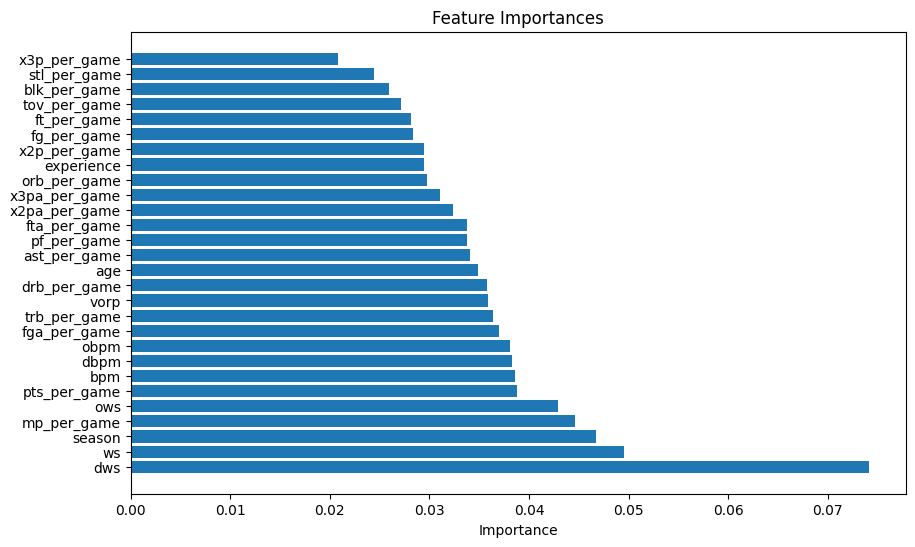

In [ ]:
feature_names = injuries_bool.columns[:-1]
importances = rfc_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

Plot injuries season-over-season

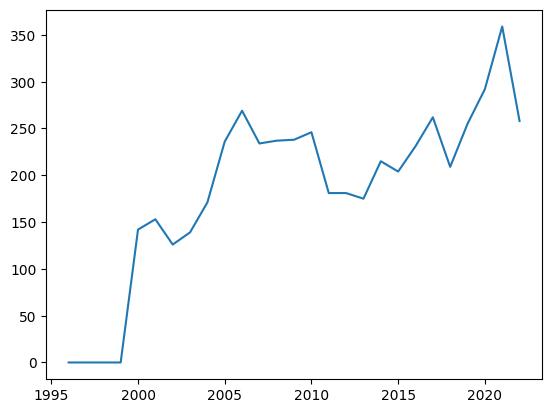

In [ ]:
actual_injuries = injuries_bool[injuries_bool['injuries']==1]
actual_injuries = actual_injuries.reset_index(drop=True)
x = range(1996, 2023)
y = [0 for i in range(2022-1995)]
for i in range(len(actual_injuries['season'])):
    y[actual_injuries['season'][i]-1996]+=actual_injuries['injuries'][i]
plt.plot(x, y)
plt.show()

In [ ]:
y

[0,
 0,
 0,
 0,
 142,
 153,
 126,
 139,
 171,
 236,
 269,
 234,
 237,
 238,
 246,
 181,
 181,
 175,
 215,
 204,
 231,
 262,
 209,
 255,
 292,
 359,
 258]

In [ ]:
injuries_bool[(injuries_bool['season']==2019) & (injuries_bool['injuries']==1)]

season   age  experience  mp_per_game  fg_per_game  fga_per_game  \
10868    2019  23.0           5         33.8          6.0          13.4   
10870    2019  25.0           2         11.4          1.5           3.5   
10871    2019  32.0          12         29.0          5.7          10.6   
10872    2019  28.0           9         28.3          3.2           7.3   
10874    2019  27.0           8         21.5          3.0           7.4   
...       ...   ...         ...          ...          ...           ...   
11560    2019  25.0           4         27.3          5.1           9.1   
11562    2019  31.0          11         23.1          2.2           5.4   
11568    2019  21.0           2         17.6          2.5           5.2   
11569    2019  23.0           5         34.5          8.4          18.0   
11572    2019  19.0           1         18.5          2.3           5.7   

       x3p_per_game  x3pa_per_game  x2p_per_game  x2pa_per_game  ...  \
10868           1.6            4.4           4.5            9.0  ...   
10870           0.5            1.6           1.0            1.9  ...   
10871           1.1            3.0           4.6            7.6  ...   
10872           1.2            3.5           2.0            3.9  ...   
10874           1.0            2.6           2.0            4.8  ...   
...             ...            ...           ...            ...  ...   
11560           0.0            0.0           5.1            9.1  ...   
11562           1.2            3.1           1.1            2.3  ...   
11568           0.5            1.6           1.9            3.6  ...   
11569           1.9            5.1           6.5           12.9  ...   
11572           1.0            2.7           1.3            3.0  ...   

       pf_per_game  pts_per_game  ows  dws   ws  obpm  dbpm  bpm  vorp  \
10868          2.2          16.0  1.8  3.3  5.1   0.3   0.3  0.6   1.7   
10870          1.1           4.0  0.0  0.9  0.9  -3.6   0.3 -3.2  -0.2   
10871          1.9          13.6  4.5  2.9  7.5   3.3   1.9  5.1   3.6   
10872          1.8           9.4  3.0  2.8  5.8   0.1   0.6  0.7   1.5   
10874          1.4           8.8  0.7  0.8  1.5  -0.6  -0.7 -1.2   0.3   
...            ...           ...  ...  ...  ...   ...   ...  ...   ...   
11560          2.8          11.9  3.8  2.9  6.7   0.2   1.1  1.2   1.8   
11562          2.4           6.0  0.5  1.0  1.5  -2.3  -0.5 -2.8  -0.2   
11568          2.3           6.6  1.4  1.5  2.9  -1.5   0.3 -1.2   0.3   
11569          2.2          23.7  1.7  1.1  2.8   2.4  -1.6  0.8   1.5   
11572          1.3           6.7  0.0  0.1  0.1  -2.8  -2.2 -5.0  -0.1   

       injuries  
10868         1  
10870         1  
10871         1  
10872         1  
10874         1  
...         ...  
11560         1  
11562         1  
11568         1  
11569         1  
11572         1  

[255 rows x 29 columns]

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the dataset
X = injuries_bool.drop(['injuries', 'season'], axis=1)
y = injuries_bool['injuries']

# Split the dataset
X_train = injuries_bool[injuries_bool['season'] % 2 != 0].drop(['injuries', 'season'], axis=1)
y_train = injuries_bool[injuries_bool['season'] % 2 != 0]['injuries']
X_test = injuries_bool[injuries_bool['season'] % 2 == 0].drop(['injuries', 'season'], axis=1)
y_test = injuries_bool[injuries_bool['season'] % 2 == 0]['injuries']

# Convert the dataset into DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the parameters for the model
params = {
    'objective': 'binary:logistic',
    'max_depth': 6,
    'learning_rate': 0.08,
    'colsample_bytree': 0.7,
    'eval_metric': 'logloss'
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100)

# Predict values for test set
y_pred_test = model.predict(dtest)
y_pred_test = [1 if x > 0.5 else 0 for x in y_pred_test]

# Calculate test metrics
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_pred_test)

print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
print(f"Test Precision: {precision_test:.2f}")
print(f"Test Recall: {recall_test:.2f}")
print(f"Test F1 Score: {f1_test:.2f}")
print(f"Test AUC: {auc_test:.2f}")

# Predict values for training set
y_pred_train = model.predict(dtrain)
y_pred_train = [1 if x > 0.5 else 0 for x in y_pred_train]

# Calculate training metrics
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)
auc_train = roc_auc_score(y_train, y_pred_train)

print(f"Training Accuracy: {accuracy_train * 100:.2f}%")
print(f"Training Precision: {precision_train:.2f}")
print(f"Training Recall: {recall_train:.2f}")
print(f"Training F1 Score: {f1_train:.2f}")
print(f"Training AUC: {auc_train:.2f}")


Test Accuracy: 67.22%
Test Precision: 0.56
Test Recall: 0.41
Test F1 Score: 0.47
Test AUC: 0.61
Training Accuracy: 83.02%
Training Precision: 0.86
Training Recall: 0.65
Training F1 Score: 0.74
Training AUC: 0.79


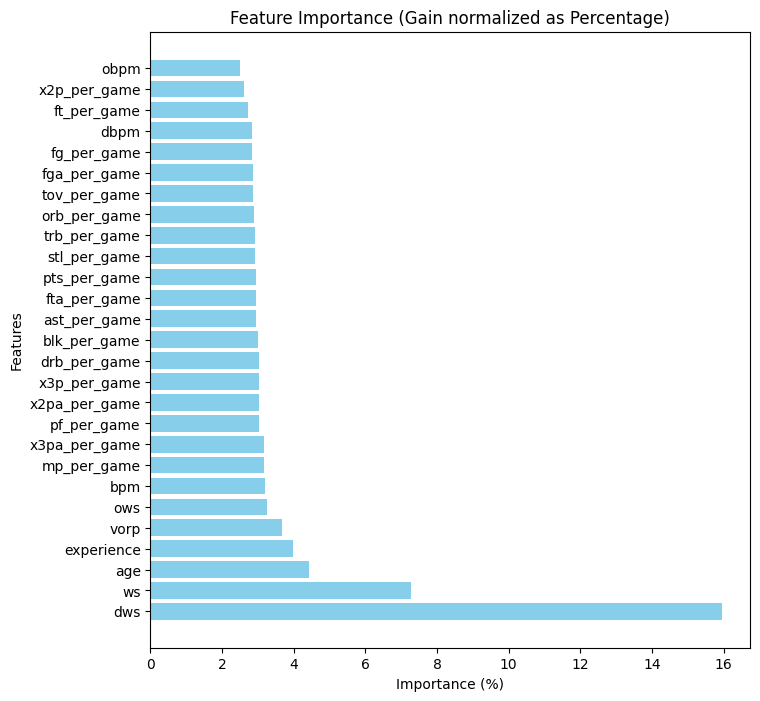

In [ ]:
importance = model.get_score(importance_type='gain')

total_gain = sum(importance.values())
importance_normalized = {k: (v / total_gain) * 100 for k, v in importance.items()}

importance_normalized = dict(sorted(importance_normalized.items(), key=lambda x: x[1], reverse=True))

fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(list(importance_normalized.keys()), list(importance_normalized.values()), color='skyblue')

ax.set_xlabel('Importance (%)')
ax.set_ylabel('Features')
ax.set_title('Feature Importance (Gain normalized as Percentage)')


plt.subplots_adjust(left=0.3)
plt.show()

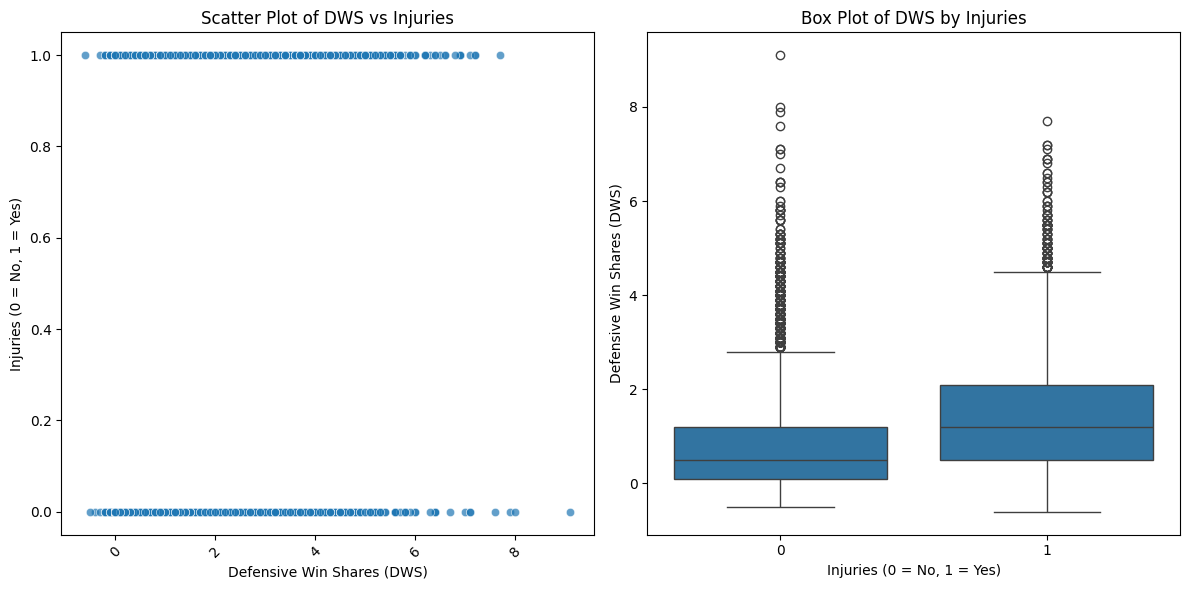

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=injuries_bool, x='dws', y='injuries', alpha=0.7)
plt.title('Scatter Plot of DWS vs Injuries')
plt.xlabel('Defensive Win Shares (DWS)')
plt.ylabel('Injuries (0 = No, 1 = Yes)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=injuries_bool, x='injuries', y='dws')
plt.title('Box Plot of DWS by Injuries')
plt.xlabel('Injuries (0 = No, 1 = Yes)')
plt.ylabel('Defensive Win Shares (DWS)')

plt.tight_layout()
plt.show()

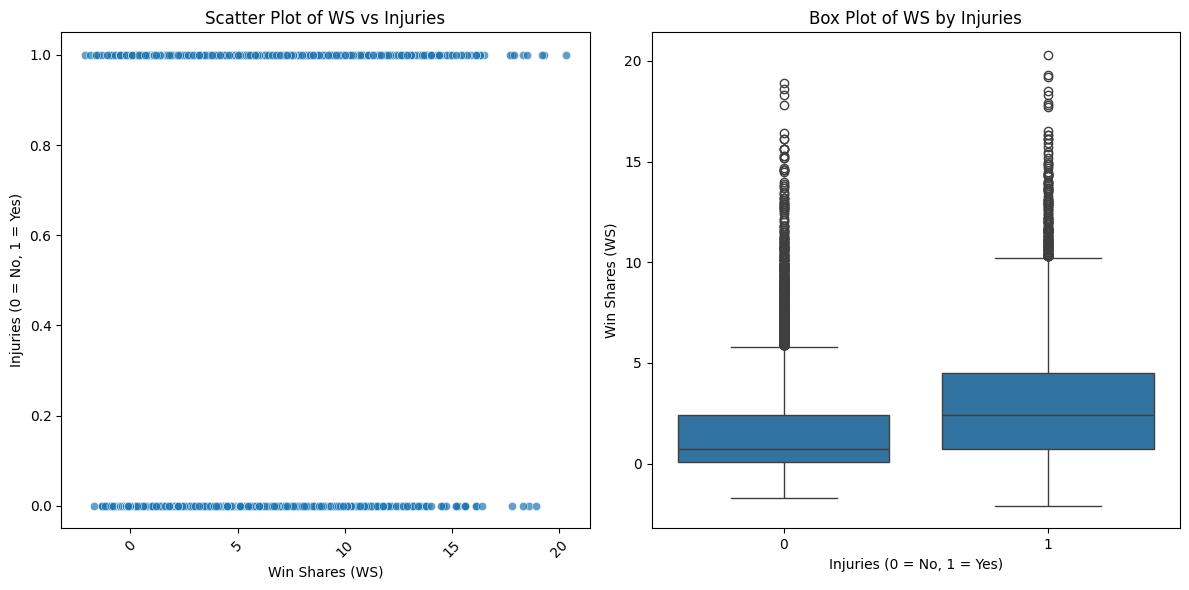

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=injuries_bool, x='ws', y='injuries', alpha=0.7)
plt.title('Scatter Plot of WS vs Injuries')
plt.xlabel('Win Shares (WS)')
plt.ylabel('Injuries (0 = No, 1 = Yes)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=injuries_bool, x='injuries', y='ws')
plt.title('Box Plot of WS by Injuries')
plt.xlabel('Injuries (0 = No, 1 = Yes)')
plt.ylabel('Win Shares (WS)')

plt.tight_layout()
plt.show()

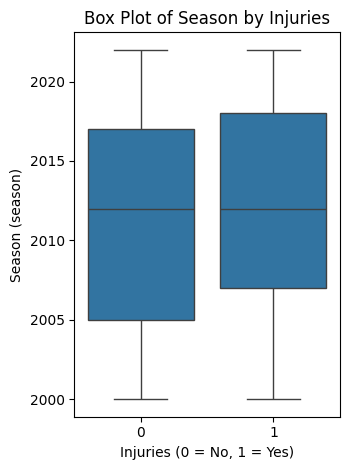

In [ ]:
plt.subplot(1, 2, 2)
sns.boxplot(data=injuries_bool, x='injuries', y='season')
plt.title('Box Plot of Season by Injuries')
plt.xlabel('Injuries (0 = No, 1 = Yes)')
plt.ylabel('Season (season)')

plt.tight_layout()
plt.show()

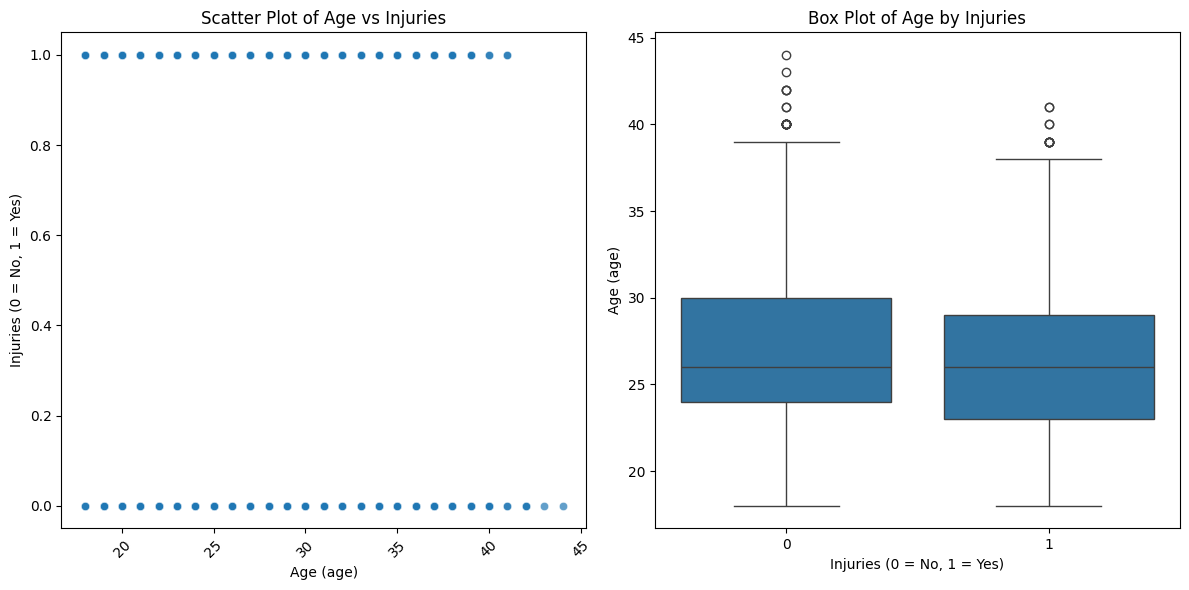

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=injuries_bool, x='age', y='injuries', alpha=0.7)
plt.title('Scatter Plot of Age vs Injuries')
plt.xlabel('Age (age)')
plt.ylabel('Injuries (0 = No, 1 = Yes)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=injuries_bool, x='injuries', y='age')
plt.title('Box Plot of Age by Injuries')
plt.xlabel('Injuries (0 = No, 1 = Yes)')
plt.ylabel('Age (age)')

plt.tight_layout()
plt.show()

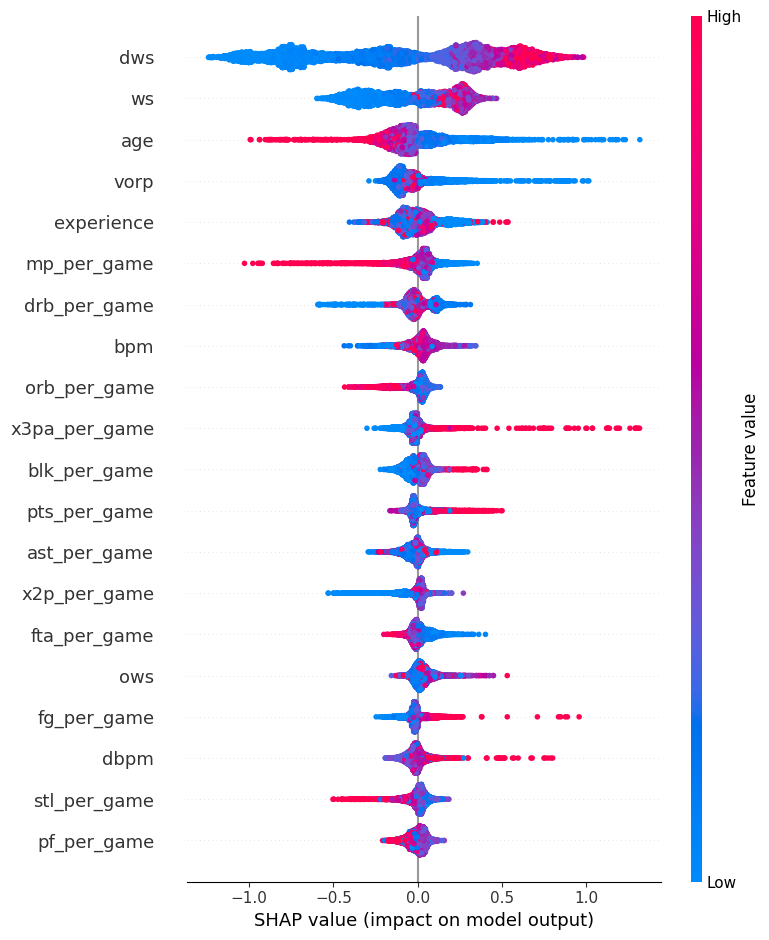

In [ ]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

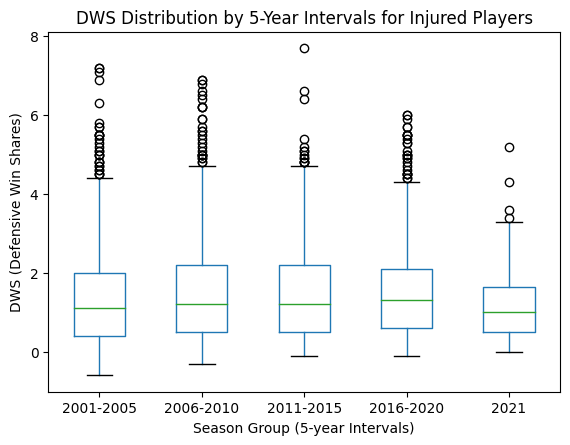

In [ ]:
injured_players = injuries_bool[injuries_bool['injuries'] == 1]

injured_players = injured_players[(injured_players['season'] >= 2001) & (injured_players['season'] <= 2021)]

# Create custom season groups
bins = [2000, 2005, 2010, 2015, 2020, 2021]
labels = ['2001-2005', '2006-2010', '2011-2015', '2016-2020', '2021']
injured_players['season_group'] = pd.cut(injured_players['season'], bins=bins, labels=labels, right=True)

injured_players.boxplot(column='dws', by='season_group', grid=False)

plt.xlabel('Season Group (5-year Intervals)')
plt.ylabel('DWS (Defensive Win Shares)')
plt.title('DWS Distribution by 5-Year Intervals for Injured Players')
plt.suptitle('')

plt.show()


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the dataset
X = injuries_bool.drop(['injuries', 'season'], axis=1)
y = injuries_bool['injuries']

# Split the dataset
X_train = injuries_bool[injuries_bool['season'] % 2 != 0].drop(['injuries', 'season'], axis=1)
y_train = injuries_bool[injuries_bool['season'] % 2 != 0]['injuries']
X_test = injuries_bool[injuries_bool['season'] % 2 == 0].drop(['injuries', 'season'], axis=1)
y_test = injuries_bool[injuries_bool['season'] % 2 == 0]['injuries']

# Convert the dataset into DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the parameters for the model
params = {
    'objective': 'binary:logistic',
    'max_depth': 6,
    'learning_rate': 0.04,
    'colsample_bytree': 0.6,
    'eval_metric': 'logloss'
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100)

# Get feature importance scores
importance = model.get_score(importance_type='weight')

# Select the top 10 most important features
top_features = sorted(importance, key=importance.get, reverse=True)[:5]

# Filter the train and test sets
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Convert the filtered sets into DMatrix
dtrain_top = xgb.DMatrix(X_train_top, label=y_train)
dtest_top = xgb.DMatrix(X_test_top, label=y_test)

# Retrain the model with the top 10 features
model_top = xgb.train(params, dtrain_top, num_boost_round=100)

# Predict and calculate accuracy for test set
y_pred_test_top = model_top.predict(dtest_top)
y_pred_test_top = [1 if x > 0.5 else 0 for x in y_pred_test_top]

# Test metrics
accuracy_test_top = accuracy_score(y_test, y_pred_test_top)
precision_test_top = precision_score(y_test, y_pred_test_top)
recall_test_top = recall_score(y_test, y_pred_test_top)
f1_test_top = f1_score(y_test, y_pred_test_top)

print(f"Test Accuracy with top 10 features: {accuracy_test_top * 100:.2f}%")
print(f"Test Precision with top 10 features: {precision_test_top:.2f}")
print(f"Test Recall with top 10 features: {recall_test_top:.2f}")
print(f"Test F1 Score with top 10 features: {f1_test_top:.2f}")

# Predict and calculate accuracy for training set
y_pred_train_top = model_top.predict(dtrain_top)
y_pred_train_top = [1 if x > 0.5 else 0 for x in y_pred_train_top]

# Training metrics
accuracy_train_top = accuracy_score(y_train, y_pred_train_top)
precision_train_top = precision_score(y_train, y_pred_train_top)
recall_train_top = recall_score(y_train, y_pred_train_top)
f1_train_top = f1_score(y_train, y_pred_train_top)

print(f"Training Accuracy with top 10 features: {accuracy_train_top * 100:.2f}%")
print(f"Training Precision with top 10 features: {precision_train_top:.2f}")
print(f"Training Recall with top 10 features: {recall_train_top:.2f}")
print(f"Training F1 Score with top 10 features: {f1_train_top:.2f}")


Test Accuracy with top 10 features: 66.37%
Test Precision with top 10 features: 0.54
Test Recall with top 10 features: 0.40
Test F1 Score with top 10 features: 0.46
Training Accuracy with top 10 features: 73.26%
Training Precision with top 10 features: 0.69
Training Recall with top 10 features: 0.51
Training F1 Score with top 10 features: 0.59


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Define the dataset
X = injuries_bool.drop(['injuries', 'season'], axis=1)
y = injuries_bool['injuries']

# Split the dataset
X_train = injuries_bool[injuries_bool['season'] % 2 != 0].drop(['injuries', 'season'], axis=1)
y_train = injuries_bool[injuries_bool['season'] % 2 != 0]['injuries']
X_test = injuries_bool[injuries_bool['season'] % 2 == 0].drop(['injuries', 'season'], axis=1)
y_test = injuries_bool[injuries_bool['season'] % 2 == 0]['injuries']

# Convert the dataset into DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the parameters for the model
params = {
    'objective': 'binary:logistic',
    'max_depth': 6,
    'learning_rate': 0.08,
    'colsample_bytree': 0.7,
    'eval_metric': 'logloss'
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100)

# Predict values for the full test set
y_pred = model.predict(dtest)
y_pred = [1 if x > 0.5 else 0 for x in y_pred]

# Create a dataframe with the test set and predicted values
test_with_predictions = injuries_bool[injuries_bool['season'] % 2 == 0].copy()
test_with_predictions['predictions'] = y_pred

print(test_with_predictions.head())  # Display the first few rows of the dataframe with predictions


   season   age  experience  mp_per_game  fg_per_game  fga_per_game  \
0    2000  36.0          15         23.5          2.1           4.7   
1    2000  23.0           1          7.6          0.5           2.6   
2    2000  27.0           6         23.8          3.0           7.2   
3    2000  28.0           6         19.1          2.9           5.6   
4    2000  29.0           8          9.7          0.9           2.1   

   x3p_per_game  x3pa_per_game  x2p_per_game  x2pa_per_game  ...  \
0           0.0            0.0           2.1            4.7  ...   
1           0.0            0.0           0.5            2.6  ...   
2           0.5            1.5           2.4            5.8  ...   
3           0.0            0.0           2.9            5.5  ...   
4           0.0            0.0           0.9            2.1  ...   

   pts_per_game  ows  dws   ws  obpm  dbpm   bpm  vorp  injuries  predictions  
0           5.0  1.7  3.3  5.0  -1.1   0.8  -0.3   0.8         0            1  
1   

In [ ]:
# Save the DataFrame to a CSV file
test_with_predictions.to_csv('test_with_predictions.csv', index=False)


In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the dataset
X = injuries_bool.drop(['injuries', 'season'], axis=1)
y = injuries_bool['injuries']

# Filter the dataset to keep only the top 10 features
X_top = X

# Split the dataset based on odd and even years
X_train_top = X_top[injuries_bool['season'] % 2 != 0]
y_train = y[injuries_bool['season'] % 2 != 0]
X_test_top = X_top[injuries_bool['season'] % 2 == 0]
y_test = y[injuries_bool['season'] % 2 == 0]

# Normalize the data
scaler = StandardScaler()
X_train_top = scaler.fit_transform(X_train_top)
X_test_top = scaler.transform(X_test_top)

# Build and train the TensorFlow neural network model
model_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_top.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_tf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_tf.fit(X_train_top, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Predict and evaluate the model on the test set
y_pred_tf = model_tf.predict(X_test_top)
y_pred_tf = [1 if x > 0.5 else 0 for x in y_pred_tf]

# Predict and evaluate the model on the training set
y_pred_train_tf = model_tf.predict(X_train_top)
y_pred_train_tf = [1 if x > 0.5 else 0 for x in y_pred_train_tf]

# Calculate test metrics
accuracy_tf = accuracy_score(y_test, y_pred_tf)
precision_tf = precision_score(y_test, y_pred_tf)
recall_tf = recall_score(y_test, y_pred_tf)
f1_tf = f1_score(y_test, y_pred_tf)
auc_test_tf = roc_auc_score(y_test, y_pred_tf)

print(f"Test Accuracy: {accuracy_tf * 100:.2f}%")
print(f"Test Precision: {precision_tf:.2f}")
print(f"Test Recall: {recall_tf:.2f}")
print(f"Test F1 Score: {f1_tf:.2f}")
print(f"Test AUC: {auc_test_tf:.2f}")

# Calculate training metrics
accuracy_train_tf = accuracy_score(y_train, y_pred_train_tf)
precision_train_tf = precision_score(y_train, y_pred_train_tf)
recall_train_tf = recall_score(y_train, y_pred_train_tf)
f1_train_tf = f1_score(y_train, y_pred_train_tf)
auc_train_tf = roc_auc_score(y_train, y_pred_train_tf)

print(f"Training Accuracy: {accuracy_train_tf * 100:.2f}%")
print(f"Training Precision: {precision_train_tf:.2f}")
print(f"Training Recall: {recall_train_tf:.2f}")
print(f"Training F1 Score: {f1_train_tf:.2f}")
print(f"Training AUC: {auc_train_tf:.2f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6522 - loss: 0.6320 - val_accuracy: 0.5785 - val_loss: 0.6460
Epoch 2/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6600 - loss: 0.6117 - val_accuracy: 0.6448 - val_loss: 0.6064
Epoch 3/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6739 - loss: 0.6025 - val_accuracy: 0.6418 - val_loss: 0.6032
Epoch 4/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6764 - loss: 0.5894 - val_accuracy: 0.6326 - val_loss: 0.6148
Epoch 5/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6871 - loss: 0.5861 - val_accuracy: 0.6502 - val_loss: 0.6048
Epoch 6/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6877 - loss: 0.5807 - val_accuracy: 0.6601 - val_loss: 0.5979
Epoch 7/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6902 - loss: 0.5731 - val_accuracy: 0.6608 - val_loss: 0.5986
Epoch 8/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6888 - loss: 0.5719 - val_accuracy: 0.6524 - val_

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the dataset with only 'vorp' and 'ws' features
X = injuries_bool[['vorp', 'ws']]
y = injuries_bool['injuries']

# Split the dataset
X_train = injuries_bool[injuries_bool['season'] % 2 != 0][['vorp', 'ws']]
y_train = injuries_bool[injuries_bool['season'] % 2 != 0]['injuries']
X_test = injuries_bool[injuries_bool['season'] % 2 == 0][['vorp', 'ws']]
y_test = injuries_bool[injuries_bool['season'] % 2 == 0]['injuries']

# Convert the dataset into DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the parameters for the model
params = {
    'objective': 'binary:logistic',
    'max_depth': 6,
    'learning_rate': 0.08,
    'colsample_bytree': 0.7,
    'eval_metric': 'logloss'
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100)

# Predict values for test set
y_pred_test = model.predict(dtest)
y_pred_test = [1 if x > 0.5 else 0 for x in y_pred_test]

# Calculate test metrics
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
print(f"Test Precision: {precision_test:.2f}")
print(f"Test Recall: {recall_test:.2f}")
print(f"Test F1 Score: {f1_test:.2f}")

# Predict values for training set
y_pred_train = model.predict(dtrain)
y_pred_train = [1 if x > 0.5 else 0 for x in y_pred_train]

# Calculate training metrics
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

print(f"Training Accuracy: {accuracy_train * 100:.2f}%")
print(f"Training Precision: {precision_train:.2f}")
print(f"Training Recall: {recall_train:.2f}")
print(f"Training F1 Score: {f1_train:.2f}")


Test Accuracy: 65.90%
Test Precision: 0.54
Test Recall: 0.33
Test F1 Score: 0.41
Training Accuracy: 67.48%
Training Precision: 0.61
Training Recall: 0.36
Training F1 Score: 0.45
